<a href="https://colab.research.google.com/github/zolzayakh/Dive-into-coding/blob/main/Hard_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**[Problem 1] Share and execute the official tutorial model**

TensorFlow 2 quickstart for beginners

In [1]:
#import libraries
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Data preparation
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


TensorFlow version: 2.8.2
11501568/11490434 [==============================] - 0s 0us/step


In [2]:
predictions = model(x_train[:1]).numpy()
predictions


array([[ 0.19368759,  0.06043945, -0.2309789 , -0.5108861 ,  0.01823342,
        -0.516902  ,  0.45424652, -0.07170254, -0.2527455 ,  0.3455122 ]],
      dtype=float32)

In [3]:
tf.nn.softmax(predictions).numpy()
#Define loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#Compile model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

#Train and evaluate your model
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

#to return a probability
probability_model = tf.keras.Sequential([
  model, tf.keras.layers.Softmax()])

probability_model(x_test[:5])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2991 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9574
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0739 - accuracy: 0.9774
313/313 - 1s - loss: 0.0741 - accuracy: 0.9766 - 577ms/epoch - 2ms/step


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.1198914e-09, 1.0867603e-08, 3.2736425e-06, 5.6969413e-05,
        3.4357404e-12, 3.6376665e-08, 1.0301742e-13, 9.9993789e-01,
        6.4551715e-09, 1.8652527e-06],
       [1.7506702e-08, 1.3640431e-05, 9.9998415e-01, 2.0060031e-06,
        3.3017027e-15, 6.8641263e-08, 1.3261109e-08, 2.1808286e-14,
        8.5645190e-08, 9.6267463e-14],
       [3.7103618e-07, 9.9897683e-01, 1.1804604e-04, 2.3036362e-05,
        7.1282615e-05, 2.7746457e-05, 7.1264469e-05, 3.3021061e-04,
        3.7656142e-04, 4.7544158e-06],
       [9.9970156e-01, 2.1813744e-09, 2.5051943e-04, 2.3223689e-07,
        1.3785369e-08, 2.7577369e-05, 3.2158223e-06, 3.0886778e-07,
        3.7564760e-08, 1.6484641e-05],
       [3.5358066e-06, 1.1332577e-08, 1.6162781e-05, 4.7669207e-07,
        9.4935179e-01, 1.8901243e-06, 4.5822635e-06, 1.7318939e-04,
        2.2400361e-06, 5.0446190e-02]], dtype=float32)>

**[Problem 3] Learning Iris (binary classification) with Keras**

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# data preparation
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

# データフレームから条件抽出
df = df[(df["Species"] == "Iris-versicolor") | (df["Species"] == "Iris-virginica")]
y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# NumPy 配列に変換
X = np.array(X)
y = np.array(y)
# ラベルを数値に変換
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y = y.astype(np.int64)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [6]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(1)
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(1)
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(1)
])

#Define loss function 
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 8)
    score = models[i].evaluate(X_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test acccurary : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/20
8/8 [==============================] - 1s 28ms/step - loss: 0.7378 - accuracy: 0.5312 - val_loss: 0.8129 - val_accuracy: 0.3750
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 0.7024 - accuracy: 0.5781 - val_loss: 0.7471 - val_accuracy: 0.7500
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.6887 - accuracy: 0.5156 - val_loss: 0.7178 - val_accuracy: 0.6250
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.4688 - val_loss: 0.7092 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.4688 - val_loss: 0.7025 - val_accuracy: 0.6250
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.4688 - val_loss: 0.7083 - val_accuracy: 0.6250
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.4688 - val_loss: 0.7186 - val_accuracy: 0.6250
Epoch 8/20
8/8 [=================

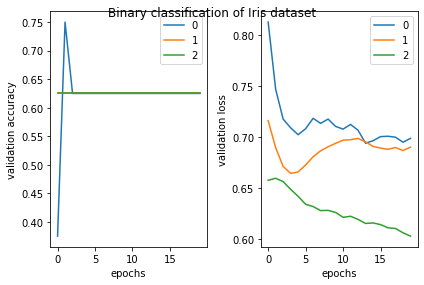

In [9]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Binary classification of Iris dataset')

for i in range(3):
    val_accurady = history_dict[i].history['val_accuracy']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation accuracy')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

**[Problem 4] Learning Iris (multi-value classification) with Keras**


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")

y = df["Species"]
X = df.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = np.array(y)
X = np.array(X)
y[y == "Iris-versicolor"] = 0
y[y == "Iris-virginica"] = 1
y[y == "Iris-setosa"] = 2
y = y.astype(np.int)[:, np.newaxis]

# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


In [12]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation='Softmax')
])

#Define loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 8)
    score = models[i].evaluate(X_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test acccurary : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/20
12/12 [==============================] - 2s 17ms/step - loss: 1.1291 - accuracy: 0.3229 - val_loss: 1.0982 - val_accuracy: 0.3333
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0816 - accuracy: 0.4688 - val_loss: 1.0712 - val_accuracy: 0.6250
Epoch 3/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0694 - accuracy: 0.6354 - val_loss: 1.0575 - val_accuracy: 0.6250
Epoch 4/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0494 - accuracy: 0.6354 - val_loss: 1.0419 - val_accuracy: 0.6250
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0348 - accuracy: 0.6354 - val_loss: 1.0261 - val_accuracy: 0.6250
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 1.0206 - accuracy: 0.6354 - val_loss: 1.0131 - val_accuracy: 0.6250
Epoch 7/20
12/12 [==============================] - 0s 6ms/step - loss: 1.0078 - accuracy: 0.6354 - val_loss: 1.0014 - val_accuracy: 0.6250
Epoch 8/20
12/12 [=

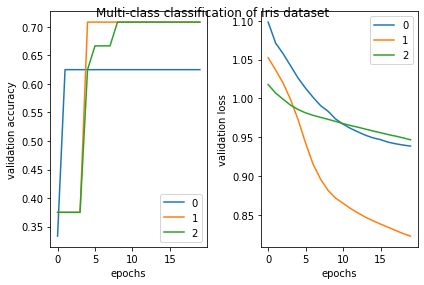

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Multi-class classification of Iris dataset')

for i in range(3):
    val_accurady = history_dict[i].history['val_accuracy']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation accuracy')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

**[Problem 5] Learning House Prices with Keras**



In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#Data preparation of House Price dataset
dataset_path ="/content/drive/MyDrive/Colab Notebooks/train.csv"
df = pd.read_csv(dataset_path)
y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]
y = np.array(y)
X = np.array(X)
y = y.astype(np.int)[:, np.newaxis]
y = np.log(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
mmsc = MinMaxScaler()
X_train = mmsc.fit_transform(X_train)
X_test = mmsc.transform(X_test)
X_val = mmsc.transform(X_val)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


In [16]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(7, activation='relu'),
  tf.keras.layers.Dense(1)
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(5,  activation='relu'),
  tf.keras.layers.Dense(1)
])

#Define loss function 
loss_fn = tf.keras.losses.MeanSquaredError()
history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=[tf.keras.metrics.MeanSquaredError()])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 8)
    score = models[i].evaluate(X_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test MSE : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/20
117/117 [==============================] - 1s 4ms/step - loss: 136.0866 - mean_squared_error: 136.0866 - val_loss: 123.1430 - val_mean_squared_error: 123.1430
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 97.5840 - mean_squared_error: 97.5840 - val_loss: 62.3811 - val_mean_squared_error: 62.3811
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 30.8884 - mean_squared_error: 30.8884 - val_loss: 7.1192 - val_mean_squared_error: 7.1192
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 3.2837 - mean_squared_error: 3.2837 - val_loss: 1.7980 - val_mean_squared_error: 1.7980
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 2.0442 - mean_squared_error: 2.0442 - val_loss: 1.7045 - val_mean_squared_error: 1.7045
Epoch 6/20
117/117 [==============================] - 0s 3ms/step - loss: 1.9171 - mean_squared_error: 1.9171 - val_loss: 1.5811 - val_mean_squared_error: 1.5811
Epoch 7/20
117

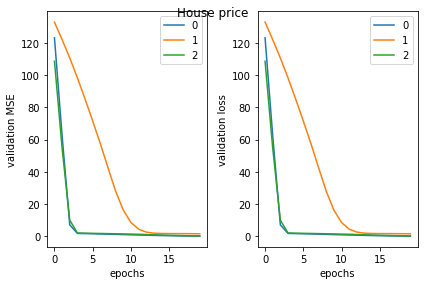

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('House price')

for i in range(3):
    val_accurady = history_dict[i].history['val_mean_squared_error']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation MSE')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

**[Problem 6] Learning MNIST with Keras**



In [19]:
# Data preparation
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [20]:
# Build a models
models = {}
models[0] = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

models[1] = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

models[2] = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

#Define loss function 
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
history_dict = {}

for i in range(3):
    models[i].compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
    
    history = models[i].fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size = 64)
    score = models[i].evaluate(x_test,  y_test, verbose=2)
    print ('Model {} => Test loss: {:.4f}, Test acccurary : {:.3f}'.format(i, score[0], score[1]))
    history_dict[i] = history

Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 0.3790 - accuracy: 0.8926 - val_loss: 0.1869 - val_accuracy: 0.9452
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.1846 - accuracy: 0.9464 - val_loss: 0.1270 - val_accuracy: 0.9623
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1387 - accuracy: 0.9588 - val_loss: 0.1064 - val_accuracy: 0.9678
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1130 - accuracy: 0.9663 - val_loss: 0.0994 - val_accuracy: 0.9695
Epoch 5/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0948 - accuracy: 0.9711 - val_loss: 0.0874 - val_accuracy: 0.9732
Epoch 6/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0798 - accuracy: 0.9749 - val_loss: 0.0805 - val_accuracy: 0.9768
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0728 - accuracy: 0.9776 - val_loss: 0.0743 - val_accuracy: 0.9758
Epoch 

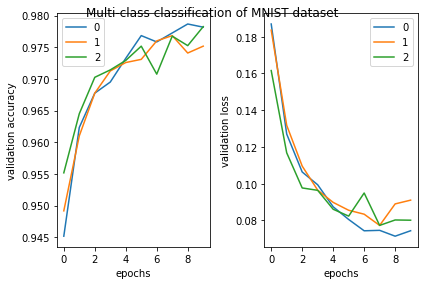

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Multi-class classification of MNIST dataset')

for i in range(3):
    val_accurady = history_dict[i].history['val_accuracy']
    val_loss = history_dict[i].history['val_loss']
    ax1.plot(val_accurady, label=i)
    ax2.plot(val_loss, label=i)
    
ax1.set_ylabel('validation accuracy')
ax1.set_xlabel('epochs')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

**[Problem 7] (Advanced assignment) Rewriting to PyTorch**



In [22]:
#Import Libraries

import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np

In [23]:
batch_size = 128
num_epochs = 2
device = torch.device('cpu')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x

In [24]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output.log(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output.log(), target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.293917
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.256630
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.463348
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.703533
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.642409

Test set: Average loss: 0.0043, Accuracy: 8984/10000 (90%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.783688
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.624856
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.476191
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.449807
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.531209

Test set: Average loss: 0.0026, Accuracy: 9343/10000 (93%)

